In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_CONTAINER = "data/"

In [11]:
def load_csv_data(file_name, data_container=DATA_CONTAINER):
    csv_path = os.path.join(data_container, file_name)
    return pd.read_csv(csv_path)

def max_latency(core1_max, core2_max, core3_max, core4_max):
    i1_max = 0
    i2_max = 0
    i3_max = 0
    i4_max = 0
    for i in range(len(core1_max)-1,0,-1):
        if(core1_max[i] != 0):
            i1_max = i
            break
    for i in range(len(core2_max)-1,0,-1):
        if(core2_max[i] != 0):
            i2_max = i
            break
    for i in range(len(core3_max)-1,0,-1):
        if(core3_max[i] != 0):
            i3_max = i
            break
    for i in range(len(core4_max)-1,0,-1):
        if(core4_max[i] != 0):
            i4_max = i
            break
    max_latency = np.max([i1_max, i2_max, i3_max, i4_max])
    return max_latency

In [12]:
latency_std = load_csv_data(file_name='histogram_stdkernel.csv')
latency_rt = load_csv_data(file_name='histogram_rtkernel.csv')

In [13]:
latency_std = latency_std.set_index('time')
latency_std.head()

latency_rt = latency_rt.set_index('time')
latency_rt.head()

,core1,core2,core3,core4
time,,,,
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [14]:
max_latency_std = max_latency(latency_std.core1.values,latency_std.core2.values,latency_std.core3.values,latency_std.core4.values)
max_latency_rt = max_latency(latency_rt.core1.values,latency_rt.core2.values,latency_rt.core3.values,latency_rt.core4.values)

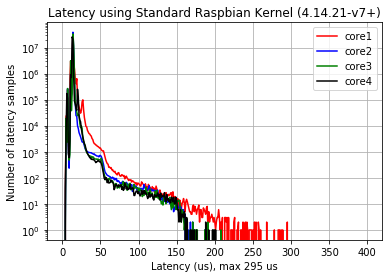

In [15]:
mnplt = 0
mxplt = 400
plt.semilogy(latency_std.index[mnplt:mxplt], latency_std.core1[mnplt:mxplt], 'r', label='core1')
plt.semilogy(latency_std.index[mnplt:mxplt], latency_std.core2[mnplt:mxplt], 'b', label='core2')
plt.semilogy(latency_std.index[mnplt:mxplt], latency_std.core3[mnplt:mxplt], 'g', label='core3')
plt.semilogy(latency_std.index[mnplt:mxplt], latency_std.core4[mnplt:mxplt], 'k', label='core4')
plt.title('Latency using Standard Raspbian Kernel (4.14.21-v7+)')
plt.ylabel('Number of latency samples')
plt.xlabel('Latency (us), max %i us' % max_latency_std)
plt.legend()
plt.grid(True)

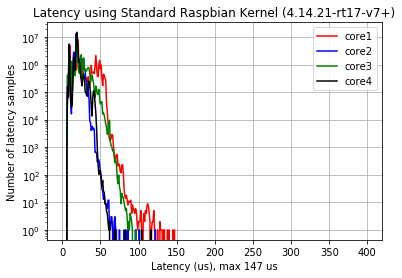

In [16]:
mnplt = 0
mxplt = 400
plt.semilogy(latency_rt.index[mnplt:mxplt], latency_rt.core1[mnplt:mxplt], 'r', label='core1')
plt.semilogy(latency_rt.index[mnplt:mxplt], latency_rt.core2[mnplt:mxplt], 'b', label='core2')
plt.semilogy(latency_rt.index[mnplt:mxplt], latency_rt.core3[mnplt:mxplt], 'g', label='core3')
plt.semilogy(latency_rt.index[mnplt:mxplt], latency_rt.core4[mnplt:mxplt], 'k', label='core4')
plt.title('Latency using Standard Raspbian Kernel (4.14.21-rt17-v7+)')
plt.ylabel('Number of latency samples')
plt.xlabel('Latency (us), max %i us' % max_latency_rt)
plt.legend()
plt.grid(True)

In [17]:
latency_std.sort_values('core1', ascending=False, inplace=False, kind='quicksort').head()

,core1,core2,core3,core4
time,,,,
14,35629715,38742731,33340727,20840188
13,3745364,1701941,183762,25763448
11,3074569,1008067,3122924,904196
15,2673523,7365711,11855719,767844
16,1444207,537723,862131,87652


In [18]:
latency_rt.sort_values('core1', ascending=False, inplace=False, kind='quicksort').head()

,core1,core2,core3,core4
time,,,,
20,8371137,1854556,2909676,7969586
21,5162113,1129750,1003193,2192208
10,4938891,430211,317813,1329979
15,2410218,2830810,1195021,1855323
44,2144522,680,167294,17350
